In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.datasets import mnist

2024-04-25 07:33:12.652586: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 07:33:12.652845: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 07:33:12.871853: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(x_train,_),(x_test,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [5]:
x_train=x_train.reshape(len(x_train),28,28,1)
x_test=x_test.reshape(len(x_test),28,28,1)

In [6]:
x_test.shape

(10000, 28, 28, 1)

In [7]:
noise=0.6
x_train_noise=x_train+noise*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noise=x_test+noise*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [8]:
x_train_noise=np.clip(x_train_noise,0.,1)
x_test_noise=np.clip(x_test_noise,0.,1)

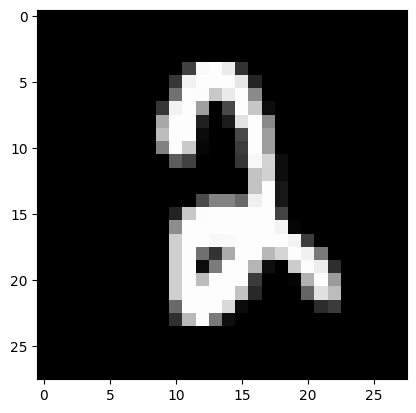

In [9]:
index=np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

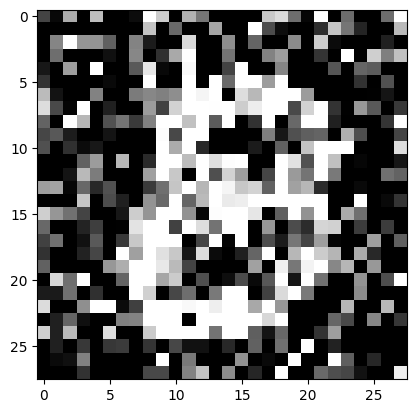

In [10]:
index=np.random.randint(len(x_test))
plt.imshow(x_test_noise[index].reshape(28,28))
plt.gray()

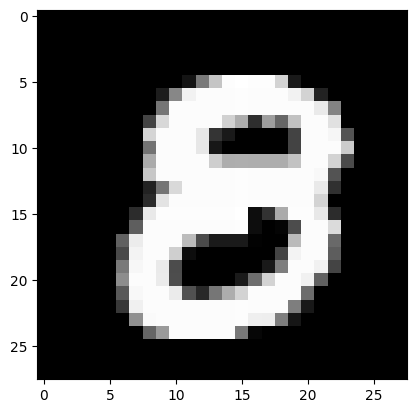

In [11]:
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

In [12]:
model=Sequential([
    #encoder
    Conv2D(32,3,activation='relu',padding='same',input_shape=(28,28,1)),
    MaxPooling2D(2,padding='same'),
    Conv2D(16,3,activation='relu',padding='same'),
    MaxPooling2D(2,padding='same'),
    #decoder
    Conv2D(16,3,activation='relu',padding='same'),
    UpSampling2D(2),
    Conv2D(32,3,activation='relu',padding='same'),
    UpSampling2D(2),
    #output
    Conv2D(1,3,activation='sigmoid',padding='same'),
])

model.compile(optimizer='adam',loss='binary_crossentropy')
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(x_train_noise,x_train,epochs=20,batch_size=256,validation_data=(x_test_noise,x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 59s 239ms/step - loss: 0.3735 - val_loss: 0.1551
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 55s 234ms/step - loss: 0.1343 - val_loss: 0.1284
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 56s 236ms/step - loss: 0.1284 - val_loss: 0.1248
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 233ms/step - loss: 0.1254 - val_loss: 0.1230
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 260ms/step - loss: 0.1234 - val_loss: 0.1211
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 266ms/step - loss: 0.1220 - val_loss: 0.1203
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 263ms/step - loss: 0.1208 - val_loss: 0.1198
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 76s 240ms/step - loss: 0.1201 - val_loss: 0.1185
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 244ms/step - loss: 0.1192 - val_loss: 0.1179
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 87s 266ms/step - loss: 0.1184 - val_loss: 0.1179
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 259ms/step - loss: 0.1182 - val_loss: 0.1169
Epoch 13/20
235/23

In [14]:
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


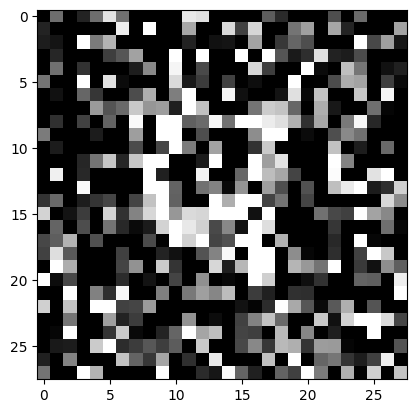

In [16]:
index=np.random.randint(len(x_test))
plt.imshow(x_test_noise[index].reshape(28,28))
plt.gray()

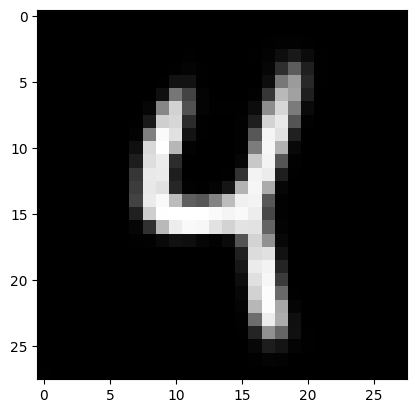

In [17]:
plt.imshow(pred[index].reshape(28,28))
plt.gray()